f(0.129) = -14289136761240.418
f(0.157) = -44107110260670.336


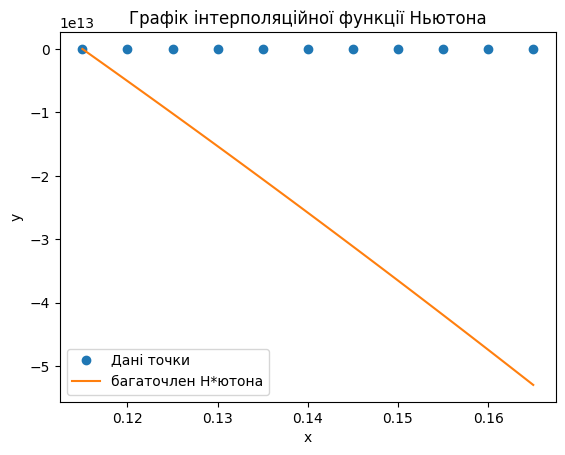

In [ ]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt


# задані точки
#x = np.array ([ i*0.005 for i in range(0.115, 0.165)]):  # задаємо x генератором списків
#x = np.array (for i in range(0.115, 0.165, 0.005)):  # задаємо x генератором списків
x = np.array([0.115,0.120,0.125,0.130,0.135,0.140,0.145,0.150,0.155,0.160,0.165])
y = np.array([8.6572, 8.2932, 7.9582, 7.6489, 7.3623, 7.0961, 6.8491, 6.6185, 6.3998, 6.1965, 6.0055])

#перша інтерполяційна формула
def first (x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y
  for j in range (1, n):
    for i in range (n-j):
      f[i,j] = (f[i+1, j-1] - f[i, j-1])/(x[i+j] - x[i])
  ans = 0
  for j in range (n):
    prod = f[0, j]
    for i in range (j):
      prod *= (x0 - x[i])
      ans += prod
  return ans

#друга інтерполяційна формула
def second(x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y
  for j in range (1, n):
    for i in range (n-j):
      f[i,j] = (f[i+1, j-1] - f[i, j-1])/(x[i+j] - x[i])
  ans = f[0,0]
  for j in range (1,n):
    prod = f[0,j]
    for i in range (j):
      prod *= (x0 - x[i])
      ans += prod
  return ans

#обчислення значеь в заданих точках
x1 = 0.129
x2 = 0.157
y1 = first(x, y, x1)
y2 = second(x, y, x2)
print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")

# графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
 yy[i] = second(x, y, xx[i])
plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='багаточлен Н*ютона')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

